In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/train2.csv')

In [ ]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,9054


In [ ]:
df['Violations'].value_counts()

2    3793
1    2398
3    2376
0     696
4     675
5      62
Name: Violations, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  object 
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [ ]:
df.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [ ]:
df.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636910,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336420,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641515,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651220,5.00000,2.365378,12500.000000


In [ ]:
df.drop('Accident_ID',axis=1,inplace=True)

<ipython-input-9-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

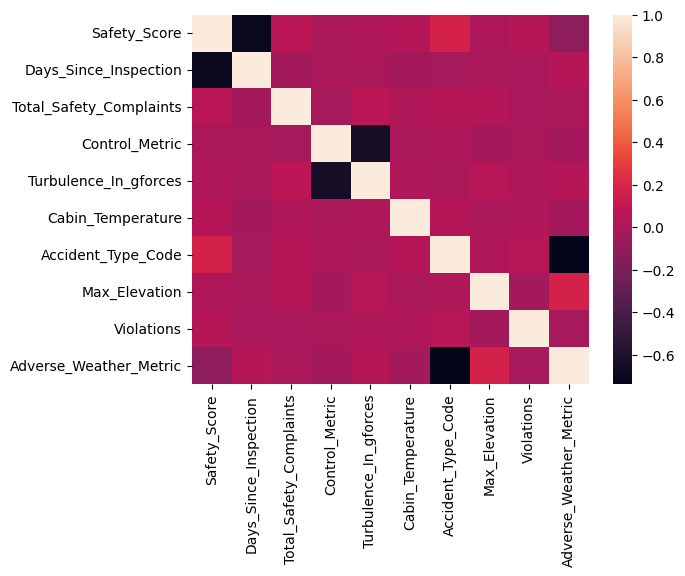

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [ ]:
#separate our dependent and independent data
X = df.iloc[:,1:].values
Y = df.iloc[:,0].values

In [ ]:
#scale our data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_new = sc.fit_transform(X)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_new,Y)

LogisticRegression()

In [ ]:
y_predict_train = lr.predict(X_new)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_predict_train))

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.71      0.81      0.76      3049
              Minor_Damage_And_Injuries       0.61      0.65      0.63      2527
      Significant_Damage_And_Fatalities       0.40      0.26      0.32      1695
Significant_Damage_And_Serious_Injuries       0.70      0.67      0.68      2729

                               accuracy                           0.64     10000
                              macro avg       0.60      0.60      0.60     10000
                           weighted avg       0.63      0.64      0.63     10000



In [ ]:
#load the testing data
df_test = pd.read_csv('/content/test2.csv')
df_test

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.72439,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.80557,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.92548,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.18634,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.52541,2,0.483696,21
...,...,...,...,...,...,...,...,...,...,...,...
2495,68.127854,8,11,49.680948,0.470819,77.80,2,48251.58662,2,0.659387,12484
2496,54.840183,9,9,71.194166,0.417087,79.77,6,20761.98442,1,0.005010,12487
2497,36.712329,14,10,91.203282,0.313950,83.96,6,36676.10060,2,0.008629,12488
2498,38.721461,13,14,73.154057,0.275003,77.38,6,24211.35951,1,0.006247,12491


In [ ]:
df_test_new = df_test.drop('Accident_ID',axis=1)

In [ ]:
#scale our test data
df_test_new = sc.fit_transform(df_test_new)

In [ ]:
Y_predict = lr.predict(df_test_new)

In [ ]:
Y_predict

array(['Highly_Fatal_And_Damaging', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries', ...,
       'Significant_Damage_And_Serious_Injuries',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

In [ ]:
x1 = pd.Series(df_test.Accident_ID)
y1 = pd.Series(Y_predict)

In [ ]:
data = pd.concat([x1,y1],axis=1)
data.columns = ['Accident_ID','Severity']

In [ ]:
data.to_csv('submission.csv',index=False)